<a href="https://colab.research.google.com/github/Vejni/Capsules_Thesis/blob/main/DatasetPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
IMG_WIDTH = IMG_HEIGHT = 32
TRAINING_SET = 0.9
TRAIN_DATA_PATH = "./gdrive/MyDrive/Histopathological_Graded/"

In [3]:
import numpy as np
import random
import torch

def set_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed(123)

In [4]:
import os
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
import PIL

transforms = transforms.Compose([
    transforms.Resize((IMG_WIDTH,IMG_HEIGHT)),
    transforms.ToTensor()
])

data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transforms)

train_size = int(TRAINING_SET*len(data))
test_size = len(data) - train_size
train_data, test_data = torch.utils.data.random_split(data, [train_size, test_size])

train_data_loader = DataLoader(train_data, batch_size=1,  num_workers=2)
test_data_loader = DataLoader(test_data, batch_size=1, num_workers=2)

print(len(train_data), len(test_data))

829 93


In [ ]:
"""mean = 0.
std = 0.
nb_samples = 0.
for data, _ in train_data_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

mean, std"""

'mean = 0.\nstd = 0.\nnb_samples = 0.\nfor data, _ in train_data_loader:\n    batch_samples = data.size(0)\n    data = data.view(batch_samples, data.size(1), -1)\n    mean += data.mean(2).sum(0)\n    std += data.std(2).sum(0)\n    nb_samples += batch_samples\n\nmean /= nb_samples\nstd /= nb_samples\n\nmean, std'

In [ ]:
import os
root_dir = "./gdrive/MyDrive/Histopathological_Graded_Preprocessed_" + str(IMG_HEIGHT)

if not os.path.exists(root_dir):
    os.makedirs(root_dir)

for t in ["train", "test"]:
    for i in range(3):
        if not os.path.exists(root_dir + "/" + t + "/" + str(i)):
            os.makedirs(root_dir + "/" + t + "/" + str(i))

i = 0
for inputs, labels in train_data_loader:
    torchvision.utils.save_image(inputs[0], root_dir + "/train/" + str(labels[0].item()) + "/" + str(i) + ".JPG")
    i += 1

i = 0
for inputs, labels in test_data_loader:
    torchvision.utils.save_image(inputs[0], root_dir + "/test/" + str(labels[0].item()) + "/" + str(i) + ".JPG")
    i += 1

In [ ]:
####################################### Patches #########################################

In [ ]:
956, 1276

(956, 1276)

In [84]:
import os
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader
import PIL

IMG_WIDTH, IMG_HEIGHT = 956, 1276
TRAINING_SET = 0.9
TRAIN_DATA_PATH = "./gdrive/MyDrive/Histopathological_Graded/"
BATCH_SIZE = 32

transforms = transforms.Compose([
    transforms.Resize((IMG_WIDTH,IMG_HEIGHT)),
    transforms.CenterCrop((512, 512)),
    transforms.ToTensor()
])

data = torchvision.datasets.ImageFolder(root=TRAIN_DATA_PATH, transform=transforms)

train_size = int(TRAINING_SET*len(data))
test_size = len(data) - train_size
train_data, test_data = torch.utils.data.random_split(data, [train_size, test_size])

train_data_loader = DataLoader(train_data, batch_size=BATCH_SIZE,  num_workers=2)
test_data_loader = DataLoader(test_data, batch_size=BATCH_SIZE, num_workers=2)

print(len(train_data), len(test_data))

829 93


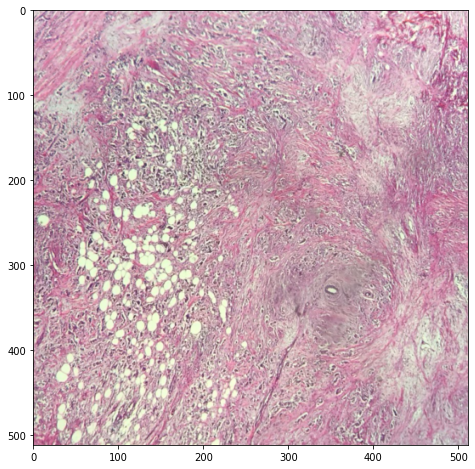

tensor(2)
torch.Size([3, 512, 512])


In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
import random

index = random.randint(0, 31)
temp = next(iter(train_data_loader))
img = temp[0][index]
label = temp[1][index]

npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

print(label)
print(img.shape)

size = 64 # patch size
stride = 64 # patch stride
print(img.shape)
patches = img.unfold(1, size, stride).unfold(2, size, stride)
print(patches.shape)
patches = patches.permute(1,2,0,3,4).contiguous()
print(patches.shape)
patches = patches.contiguous().view(-1, 3, 64, 64)
print(patches.shape)
imshow(torchvision.utils.make_grid(patches))

In [86]:
import os
from tqdm import tqdm

root_dir = "./gdrive/MyDrive/Histopathological_Graded_Preprocessed_Patched"


if not os.path.exists(root_dir):
    os.makedirs(root_dir)

for t in ["train", "test"]:
    for i in range(3):
        if not os.path.exists(root_dir + "/" + t + "/" + str(i)):
            os.makedirs(root_dir + "/" + t + "/" + str(i))

i = 0
size = 64 # patch size
stride = 64 # patch stride

for inputs, labels in tqdm(train_data_loader):
    patches = img.unfold(1, size, stride).unfold(2, size, stride)
    patches = patches.permute(1,2,0,3,4).contiguous()
    patches = patches.contiguous().view(-1, 3, 64, 64)
    for patch in patches:
        torchvision.utils.save_image(patch, root_dir + "/train/" + str(labels[0].item()) + "/" + str(i) + ".JPG")
        i += 1

for inputs, labels in tqdm(test_data_loader):
    patches = img.unfold(1, size, stride).unfold(2, size, stride)
    patches = patches.permute(1,2,0,3,4).contiguous()
    patches = patches.contiguous().view(-1, 3, 64, 64)
    for patch in patches:
        torchvision.utils.save_image(patch, root_dir + "/train/" + str(labels[0].item()) + "/" + str(i) + ".JPG")
        i += 1


100%|██████████| 26/26 [03:22<00:00,  7.78s/it]

100%|██████████| 3/3 [00:30<00:00, 10.26s/it]
